In [115]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


# needed for editable text in svg format
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'

# import homemade functions:
from MAPseq_processing import *
from MAPseq_plotting import *

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'
# out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

#### load data - OMC
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")
# omc_countN = pd.read_pickle(in_path+"M194_M220_OMC_countN4.pkl")

#### load data - OMC
aca_bin = pd.read_pickle(in_path+"M194_M220_ACA_bin4.pkl")
# aca_countN = pd.read_pickle(in_path+"M194_M220_ACA_countN4.pkl")


# Preprocessing/sorting

In [3]:
# initial processing - OMC
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]


In [498]:
# seperate then concatenate by species
mm_it = [omc_it[i] for i in range(len(omc_it)) if metadata.loc[i,"species"]=="MMus"]
st_it = [omc_it[i] for i in range(len(omc_it)) if metadata.loc[i,"species"]=="STeg"]
mm_it_all = pd.concat(mm_it)
st_it_all = pd.concat(st_it)

mm_pt = [omc_pt[i] for i in range(len(omc_pt)) if metadata.loc[i,"species"]=="MMus"]
st_pt = [omc_pt[i] for i in range(len(omc_pt)) if metadata.loc[i,"species"]=="STeg"]
mm_pt_all = pd.concat(mm_pt)
st_pt_all = pd.concat(st_pt)

In [4]:
# initial processing - ACA
# bin processing
aca_clean = [clean_up_data(df, to_drop=["OB", "OMCi", "OMCc", "HIP"], inj_site="ACAi") for df in aca_bin]
aca_type = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in aca_clean]

# seperate it cells
aca_it = [df[df['type']=="IT"] for df in aca_type]

# seperate pt cells
aca_pt = [df[df['type']=="PT"] for df in aca_type]


In [15]:
print("MOUSE", "\t", "OMC_IT", "\t", "ACA_IT")
for i in range(metadata.shape[0]):
    print(metadata.loc[i, "mice"], "\t", omc_it[i].shape[0], "\t\t", aca_it[i].shape[0])

MOUSE 	 OMC_IT 	 ACA_IT
MMM1 	 8287 		 5645
MMF2 	 13050 		 13562
MMF3 	 11521 		 31123
STM1 	 535 		 265
STM2 	 443 		 2481
STF3 	 306 		 1985
MMM4 	 5201 		 3647
MMF5 	 15256 		 13150
STF4 	 675 		 639
STM5 	 380 		 1632
STF6 	 776 		 2342
STM7 	 527 		 1174


# Calculate/plot motifs across animals

## OMC

In [86]:
motifs = []
for i in range(1,4):
    motifs.append(list(combinations(["OMCc", "AUD", "STR"], i)))

motifs = [x for item in motifs for x in item]
memberships = from_memberships(motifs)
motif_tf = memberships.index
motif_tf

motifs_strings = []
for r in motif_tf:
    motif = ""
    for i in range(3):
        if r[i]:
            motif = motif+motif_tf.names[i]+"_"
    motifs_strings.append(motif)

In [87]:
it_areas = ["OMCc", "AUD", "STR"]

it_motif_prop = [df_to_motif_proportion(df, areas=it_areas) for df in omc_it]

motif_dfs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame({"motif":motifs, "motif_strings":motifs_strings,
                         "proportion":it_motif_prop[i], "species":metadata.loc[i, "species"], 
                        "mice":metadata.loc[i,"mice"]}).reset_index(drop=True)
    motif_dfs.append(df)
plot_motifs = pd.concat(motif_dfs)
plot_motifs

,motif,motif_strings,proportion,species,mice
0,"(OMCc,)",OMCc_,0.135513,MMus,MMM1
1,"(AUD,)",AUD_,0.000362,MMus,MMM1
2,"(STR,)",STR_,0.321950,MMus,MMM1
3,"(OMCc, AUD)",AUD_OMCc_,0.000965,MMus,MMM1
4,"(OMCc, STR)",OMCc_STR_,0.528418,MMus,MMM1
...,...,...,...,...,...
2,"(STR,)",STR_,0.055028,STeg,STM7
3,"(OMCc, AUD)",AUD_OMCc_,0.017078,STeg,STM7
4,"(OMCc, STR)",OMCc_STR_,0.666034,STeg,STM7
5,"(AUD, STR)",AUD_STR_,0.007590,STeg,STM7


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  t_ax = sns.barplot(df, x=xaxis, y=yaxis, hue=hueaxis, errorbar=errorbar, errwidth=1)


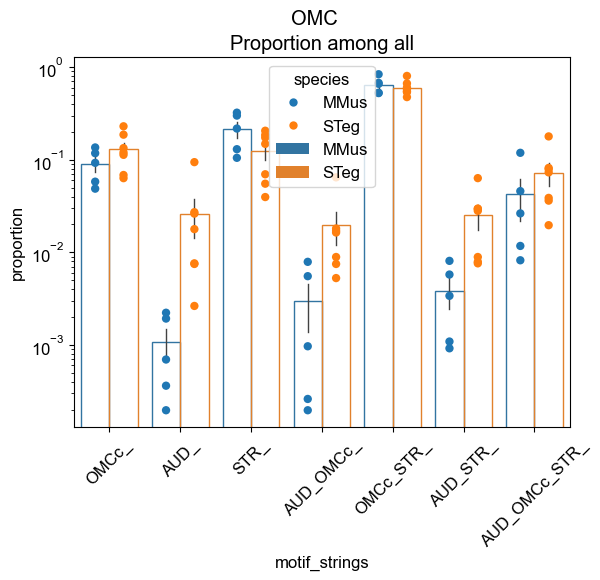

In [88]:
dot_bar_plot(plot_motifs, xaxis="motif_strings", yaxis="proportion", hueaxis="species", dot_size=6)
plt.yscale("log")
plt.xticks(rotation=45, ha="center")
plt.suptitle("OMC")
plt.title("Proportion among all")
plt.show()

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(labels[i], (st_mean[to_plot][i], mm_mean[to_plot][i]))


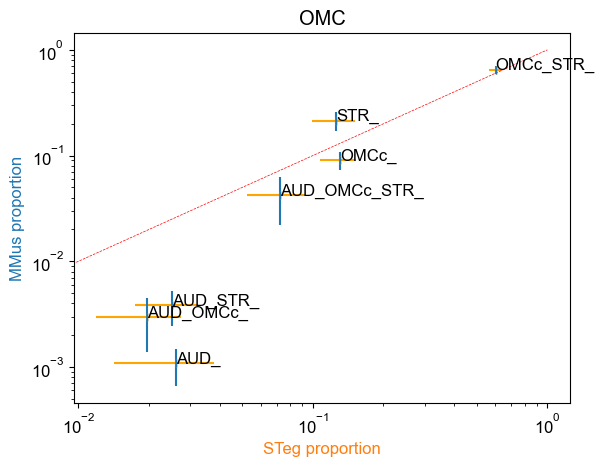

In [89]:
stvmm_area_scatter(plot_motifs, to_plot="proportion", groupby="motif_strings",
                   log=True)
plt.title("OMC")
plt.show()


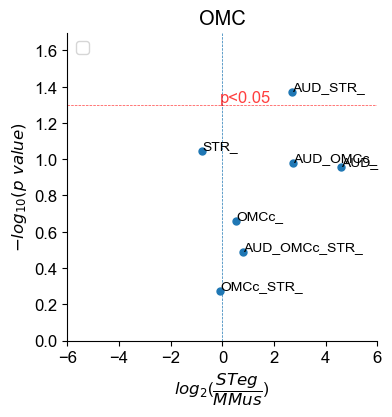

In [90]:
# volano plot
plot_df = proportion_ttest(plot_motifs, groupby="motif_strings")
plot_volcano(plot_df, labels="motif_strings", xlim=(-6,6), p_01=False)
plt.title("OMC")
plt.show()

## ACA

In [91]:
# generate motif strirngs
motifs = []
for i in range(1,4):
    motifs.append(list(combinations(["ACAc", "AUD", "STR"], i)))

motifs = [x for item in motifs for x in item]
memberships = from_memberships(motifs)
motif_tf = memberships.index
motif_tf

motifs_strings = []
for r in motif_tf:
    motif = ""
    for i in range(3):
        if r[i]:
            motif = motif+motif_tf.names[i]+"_"
    motifs_strings.append(motif)

print(motifs)
motifs_strings

[('ACAc',), ('AUD',), ('STR',), ('ACAc', 'AUD'), ('ACAc', 'STR'), ('AUD', 'STR'), ('ACAc', 'AUD', 'STR')]


['ACAc_',
 'AUD_',
 'STR_',
 'ACAc_AUD_',
 'ACAc_STR_',
 'AUD_STR_',
 'ACAc_AUD_STR_']

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  t_ax = sns.barplot(df, x=xaxis, y=yaxis, hue=hueaxis, errorbar=errorbar, errwidth=1)


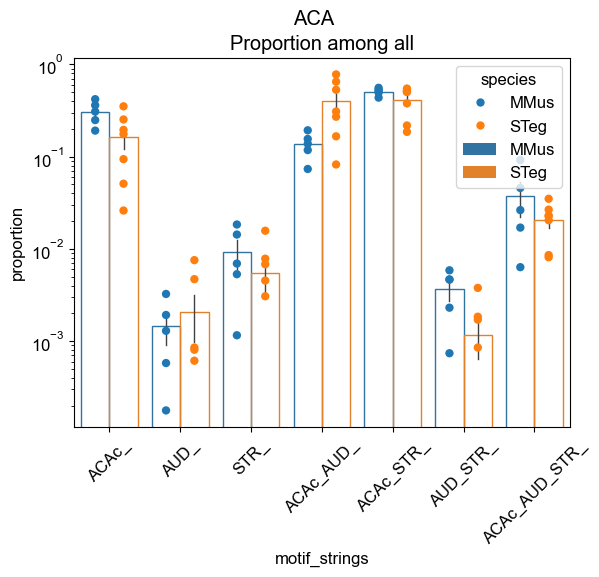

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(labels[i], (st_mean[to_plot][i], mm_mean[to_plot][i]))


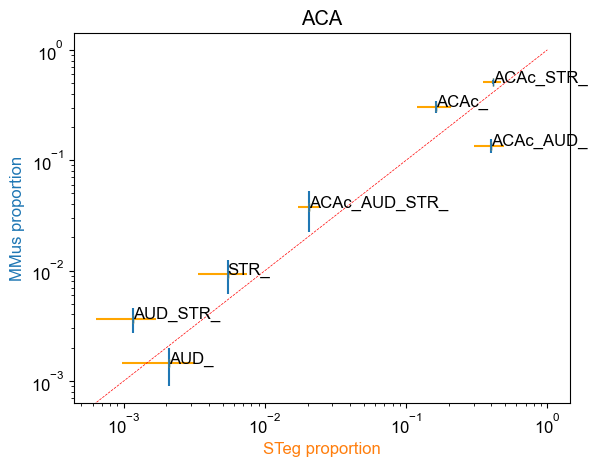

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:349: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('$log_{2}$($\dfrac{STeg}{MMus}$)')
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:352: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$-log_{10}(p\ value)$')
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:466: SyntaxWarning: invalid escape sequence '\M'
  plt.ylabel("Log2(r'\frac{Steg}{\MMus}$')")


TypeError: tuple indices must be integers or slices, not str

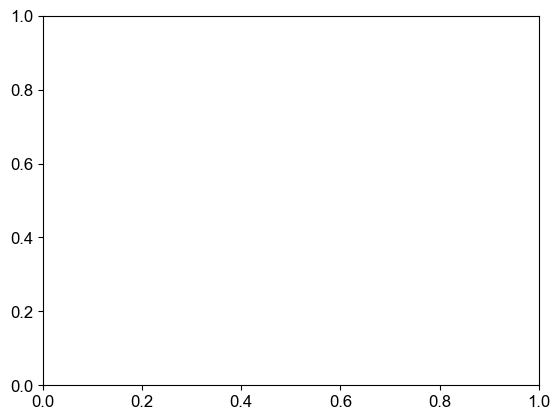

In [384]:
it_areas = ["ACAc", "AUD", "STR"]

it_motif_prop = [df_to_motif_proportion(df, areas=it_areas) for df in aca_it]


motif_dfs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame({"motif":motifs, "motif_strings":motifs_strings,
                         "proportion":it_motif_prop[i], "species":metadata.loc[i, "species"], 
                        "mice":metadata.loc[i,"mice"]}).reset_index(drop=True)
    motif_dfs.append(df)
plot_motifs = pd.concat(motif_dfs)

dot_bar_plot(plot_motifs, xaxis="motif_strings", yaxis="proportion", hueaxis="species", dot_size=6)
plt.yscale("log")
plt.xticks(rotation=45, ha="center")
plt.suptitle("ACA")
plt.title("Proportion among all")
plt.show()

stvmm_area_scatter(plot_motifs, to_plot="proportion", groupby="motif_strings",
                   log=True)
plt.title("ACA")
plt.show()

# volano plot
plot_df = proportion_ttest(plot_motifs, groupby="motif_strings")
plot_volcano(plot_df, labels="motif_strings", xlim=(-6,6), p_01=False)
plt.title("ACA")
plt.show()

# Simulated Data
- figure out discrepancy b/w shuffled and calculated proportions

## trouble shooting

In [294]:
dummy_prob = [0.1, 0.9, 0.7, 0.2]

array_size=1000
area_vectors = []
for p in dummy_prob:
    array = np.random.choice([1, 0], size=array_size, p=[p, 1-p])
    area_vectors.append(array)

# turn into dataframe
test_df = pd.DataFrame({"A":area_vectors[0], "B":area_vectors[1], "C":area_vectors[2], "D":area_vectors[3]})


In [295]:
areas = ["A", "B", "C", "D"]
bulk_prop = test_df.sum()/test_df.shape[0]
obs_prop = df_to_motif_proportion(test_df, areas=areas)
motif_tf = obs_prop.index
motif_strings = TF_to_motifs(motif_tf)

calc_prop = df_to_calc_pab_proportions(test_df, combinations=motif_tf)
print(calc_prop)


A      B      C      D    
True   False  False  False    0.010000
False  True   False  False    0.850084
       False  True   False    0.522729
              False  True     0.038416
True   True   False  False    0.092200
       False  True   False    0.072300
              False  True     0.019600
False  True   True   False    0.666606
              False  True     0.180712
       False  True   True     0.141708
True   True   True   False    0.066661
              False  True     0.018071
       False  True   True     0.014171
False  True   True   True     0.130655
True   True   True   True     0.013065
dtype: float64


In [296]:
print(calc_prop.sum())

2.8369778536000005


In [174]:

reps = 1000
simulations = []
for i in range(reps):
    shuffle_df = test_df.copy()
    for col in shuffle_df.columns:
        shuffle_col = np.array(shuffle_df[col]) # convert to array for np..shuffle
        np.random.shuffle(shuffle_col)
        shuffle_df[col] = shuffle_col
    simulations.append(shuffle_df)

sim_prop1 = []
for sim in simulations:
    sim_prop1.append(df_to_motif_proportion(sim, areas = sim.columns))
sim_prop1_mean = np.array(sim_prop1).mean(axis=0)
sim_prop1_std = np.array(sim_prop1).std(axis=0)

In [177]:
sim_prop2 = motif_simulation(test_df, plot_areas=areas, reps=100)

sim_prop2_mean = np.array(sim_prop2).mean(axis=0)
sim_prop2_std = np.array(sim_prop2).std(axis=0)

prop_df = pd.DataFrame({"motif":motif_strings, "obs_prop":obs_prop, "calc_prop":calc_prop, 
              "sim_prop1":sim_prop1_mean, "sim_prop2":sim_prop2_mean}).reset_index(drop=True)

prop_df


,motif,obs_prop,calc_prop,sim_prop1,sim_prop2
0,A_,0.002,0.010201,0.002501,0.00224
1,B_,0.174,0.797449,0.182211,0.18297
2,C_,0.057,0.509796,0.054633,0.05502
3,D_,0.004,0.041616,0.005572,0.00582
4,A_B_,0.023,0.090193,0.020598,0.02125
5,A_C_,0.008,0.072114,0.006150,0.00575
6,A_D_,0.001,0.020604,0.000634,0.00073
7,B_C_,0.460,0.637602,0.456652,0.45600
8,B_D_,0.053,0.182172,0.047262,0.04677
9,C_D_,0.010,0.145656,0.014040,0.01477


### pair down to 2 columns

In [179]:
a = np.random.choice([1,0], size=1000, p=[0.3,0.7])
b = np.random.choice([0,1], size=1000, p=[0.3,0.7])

test = pd.DataFrame({"A":a, "B":b})
test

,A,B
0,1,0
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
995,0,0
996,0,0
997,0,1
998,1,0


In [184]:
idx = test.sum(axis=1)>0
pos = test[idx]

In [189]:
print
test.sum()/test.shape[0]
pos.sum()/pos.shape[0]

A    0.379397
B    0.876884
dtype: float64

## Calculation of N-total
- Taken from Methods section of Han et al., 2017

$$
\frac{N_{obs}}{N_{total}} + \Pi_{i=1}^k(1-\frac{N_{Ai}}{N_{total}}) = 1
$$

For 3 areas, k=3, then expand that to:
$$
(N_{obs}-N_{A1}-N_{A2}-N_{A3})N_{total}^{2} + (N_{A1}N_{A2} + N_{A1}N_{A3} + N_{A2}N_{A3})N_{total} - (N_{A1}N_{A2}N_{A3}) = 0
$$

Solve for $N_{total}$

In [218]:
# do first with dummy data
a = np.random.choice([1,0], size=1000, p=[0.3,0.7])
b = np.random.choice([0,1], size=1000, p=[0.3,0.7])

test = pd.DataFrame({"A":a, "B":b})
idx = test.sum(axis=1)>0 # get rid of empty rows (i.e. cells that don't project anywhere)
pos = test[idx]

n_obs = pos.shape[0]
n_a = pos.sum()["A"]
n_b = pos.sum()["B"]

print("n_obs", n_obs)
print(pos.sum())
print(n_a)
print(n_b)

print("\n")

print("true proportions")
print("P(a)", str(0.3))
print("P(b)", str(0.7))
print("\n")

print("unadjusted proportions:")
print("P(a)", n_a/pos.shape[0])
print("P(b)", n_b/pos.shape[0])

# solve linear equation
a = (n_obs - n_a - n_b)
b = n_a*n_b
# ax+b=0, solve for x
n_tot = -b/a
print("\n")
print("n_tot", n_tot)
print("\n")
print("adjusted proportions:")
print("P(a)", n_a/n_tot)
print("P(b)", n_b/n_tot)


n_obs 800
A    305
B    701
dtype: int64
305
701


true proportions
P(a) 0.3
P(b) 0.7


unadjusted proportions:
P(a) 0.38125
P(b) 0.87625


n_tot 1037.888349514563


adjusted proportions:
P(a) 0.29386590584878747
P(b) 0.6754098360655738


In [234]:
# Add back unobserved neurons
n_unobs = round(n_tot - n_obs)
missing_df = pd.DataFrame({'A':[0]*n_unobs, "B":[0]*n_unobs})
all_df = pd.concat([pos, missing_df]).reset_index(drop=True)

# Shuffle data
shuffles, sim_counts = motif_simulation(all_df, plot_areas=["A", "B"], reps=100, proportion_out=False)

sim_motif_prop = [series/n_tot for series in sim_counts]
sim_motif_prop[0]

A      B    
True   False    0.105984
False  True     0.487528
True   True     0.187881
dtype: float64

In [238]:
sim_motif_mean = np.array(sim_motif_prop).mean(axis=0)
sim_motif_mean

array([0.09620495, 0.47774888, 0.19766095])

In [240]:
df_to_motif_proportion(pos, areas=["A", "B"], proportion=False)/n_tot

A      B    
True   False    0.095386
False  True     0.476930
True   True     0.198480
dtype: float64

In [242]:
p_a = n_a/n_tot
p_b = n_b/n_tot

print("proportion A-", p_a*(1-p_b))
print("proportion -B", (1-p_a)*(p_b))
print("proportion AB", p_a*p_b)

proportion A- 0.09538598255419657
proportion -B 0.4769299127709829
proportion AB 0.19847992329459088


In [ ]:


# shuffle data
shuffles, sim_prop = motif_simulation(test, plot_areas=["A", "B"], reps=100)
# add unobserved neurons


In [216]:
dumb = shuffles[0].copy()
dumb.shape[0]
pos_du = dumb[dumb.sum(axis=1)>0]
n_unobs = test.shape[0]- pos_du.shape[0]
pos_du.reset_index(drop=True, inplace=True)
empty = pd.DataFrame({'A':[0]*n_unobs, "B":[0]*n_unobs})


,A,B
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
179,0,0
180,0,0
181,0,0
182,0,0


In [ ]:

## orignal numbers
# bulk = n_obs/n_tot
a_prop = n_a/n_tot
b_prop = n_b/n_tot


# Calculate motif proportion w/ new n_tot

# observed motif proportion (w/ n_tot)

# calc motif proportions

# simulated motif proportions
# add 0s rows to match 'og' N_total

# observerd motif numbers


# Observed motif prop - adjusted

#

# Apply $N_{total}$ calculation to real data

## Calculation of N-total
- Taken from Methods section of Han et al., 2017
$$
\frac{N_{obs}}{N_{total}} + \Pi_{i=1}^k(1-\frac{N_{Ai}}{N_{total}}) = 1
$$
For 3 areas, k=3, then expand that to:
$$
(N_{obs}-N_{A1}-N_{A2}-N_{A3})N_{total}^{2} + (N_{A1}N_{A2} + N_{A1}N_{A3} + N_{A2}N_{A3})N_{total} - (N_{A1}N_{A2}N_{A3}) = 0
$$

In [524]:
def estimate_N_total(df, plot_areas=["OMCc", "AUD", "STR"]):
    """Given dataframe of binary BC x area, calcualte estimated original N_total from 
    N_observed and N of different area motifs

    Returns: integer of estimated N_total (rounded)

    Args:
        df (DataFrame): Binarized BC x area data
    """

    # get n_obs
    n_obs = df.shape[0]
    n_areas = [df.sum()[area] for area in plot_areas]
    
    # derived from t_total formula from Han et al., 2017
    # written out for 3 areas
    a = (n_obs - n_areas[0]-n_areas[1]-n_areas[2])
    b = (n_areas[0]*n_areas[1] + n_areas[0]*n_areas[2] + n_areas[1]*n_areas[2])
    c = -1*(n_areas[0]*n_areas[1]*n_areas[2])

    # solve for n_total with quadratic formula
    roots = np.roots([a,b,c])

    if roots[0] > n_obs:
        n_total = round(roots[0])
    elif roots[1] > n_obs:
        n_total = round(roots[1])
    else:
        n_total = "roots equal or less than n_obs"

    return(n_total)

In [525]:
n_totals = [estimate_N_total(df) for df in omc_it]

n_shapes = [df.shape[0] for df in omc_it]
print(n_shapes)
print(n_totals)

[8287, 13050, 11521, 535, 443, 306, 5201, 15256, 675, 380, 776, 527]
[8949, 13847, 11853, 555, 472, 331, 5253, 15349, 699, 381, 859, 530]


In [526]:
# find bulk probabilities of each area given estimated n_totals
plot_areas = ["OMCc", "AUD", "STR"]
p_obs = []
for i in range(metadata.shape[0]):
    df = omc_it[i]
    area_totals = df.sum()[plot_areas]
    probabilities = area_totals/n_totals[i]
    p_obs.append(probabilities)

p_obs[0]

OMCc     0.62655
AUD     0.013074
STR     0.799307
dtype: object

In [527]:
# calcualte dependent probabilties

# 1. add in zeros to make to n_total
n_unobs = np.array(n_totals) - np.array(n_shapes)
cols = omc_it[0].columns
pd.DataFrame(n_unobs)
unobs_df = [pd.DataFrame(0, index=np.arange(n), columns=cols) for n in n_unobs]
omc_it_adjusted = [pd.concat([omc_it[i], unobs_df[i]]).reset_index(drop=True) for i in range(len(omc_it))]
omc_it_adjusted[0]



,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,type
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [528]:
obs_motifs = [df_to_motif_proportion(df, areas=["OMCc", "AUD", "STR"]) for df in omc_it_adjusted]
n_obs_motifs = [df_to_motif_proportion(df, areas=["OMCc", "AUD", "STR"], proportion=False) for df in omc_it_adjusted]
n_obs_motifs[0]

AUD    OMCc   STR  
False  True   False    1123
True   False  False       3
False  False  True     2668
True   True   False       8
False  True   True     4379
True   False  True        9
       True   True       97
dtype: int64

In [529]:
# calcualtions based on bulk probabilities
calc_motifs = [df_to_calc_pab_proportions(df, combinations=obs_motifs[0].index) for df in omc_it_adjusted]
calc_motifs[0]

AUD    OMCc   STR  
False  True   False    0.124100
True   False  False    0.000980
False  False  True     0.294598
True   True   False    0.001644
False  True   True     0.494259
True   False  True     0.003903
       True   True     0.006548
dtype: float64

In [530]:
# simulated motifs
sim_avgs = []
sim_stds = []
for i in range(metadata.shape[0]):
    foo, shuffle_prob_reps = motif_simulation(omc_it_adjusted[i])
    shuffled_array = np.array(shuffle_prob_reps)
    sim_avgs.append(shuffled_array.mean(axis=0))
    sim_stds.append(shuffled_array.std(axis=0))


In [531]:
motif_strings = TF_to_motifs(motifs.index)
motif_strings

['OMCc_',
 'AUD_',
 'STR_',
 'AUD_OMCc_',
 'OMCc_STR_',
 'AUD_STR_',
 'AUD_OMCc_STR_']

In [532]:
all_motif_dfs = [pd.DataFrame({"motif_strings":motif_strings, "n_total":n_totals[i], "n_obs":n_obs_motifs[i],
                               "obs_prob":obs_motifs[i], "calc_prob":calc_motifs[i], 
                               "sim_avg":sim_avgs[i], "sim_std":sim_stds[i]}).reset_index(drop=True)
                     for i in range(metadata.shape[0])]
for i in range(metadata.shape[0]):
    all_motif_dfs[i][["mice", "species"]] = [metadata.loc[i,"mice"], metadata.loc[i,"species"]]
it_motif_df = pd.concat(all_motif_dfs)
it_motif_df


,motif_strings,n_total,n_obs,obs_prob,calc_prob,sim_avg,sim_std,mice,species
0,OMCc_,8949,1123,0.125489,0.124100,0.124108,0.002029,MMM1,MMus
1,AUD_,8949,3,0.000335,0.000980,0.000971,0.000309,MMM1,MMus
2,STR_,8949,2668,0.298134,0.294598,0.294585,0.002072,MMM1,MMus
3,AUD_OMCc_,8949,8,0.000894,0.001644,0.001638,0.000386,MMM1,MMus
4,OMCc_STR_,8949,4379,0.489328,0.494259,0.494257,0.002108,MMM1,MMus
...,...,...,...,...,...,...,...,...,...
2,STR_,530,29,0.054717,0.053811,0.053543,0.005009,STM7,STeg
3,AUD_OMCc_,530,9,0.016981,0.018997,0.018977,0.005088,STM7,STeg
4,OMCc_STR_,530,351,0.662264,0.659190,0.659366,0.006878,STM7,STeg
5,AUD_STR_,530,4,0.007547,0.014256,0.014566,0.004477,STM7,STeg


In [533]:
# significance testing
from scipy.stats import binomtest
it_motif_df = it_motif_df.reset_index(drop=True)
it_motif_df["p_value"] = it_motif_df.apply(lambda row: binomtest(row["n_obs"], row["n_total"], p=row["calc_prob"]).pvalue, axis='columns')
# log2fc of obs_prob/calc_prob
it_motif_df["log2_fc"] = it_motif_df.apply(lambda row: np.log2(row["obs_prob"]/row["calc_prob"]), axis="columns")
# -log10p
it_motif_df["nlog10_p"] = it_motif_df.apply(lambda row: (np.log10(row["p_value"]))*-1, axis="columns")
it_motif_df

,motif_strings,n_total,n_obs,obs_prob,calc_prob,sim_avg,sim_std,mice,species,p_value,log2_fc,nlog10_p
0,OMCc_,8949,1123,0.125489,0.124100,0.124108,0.002029,MMM1,MMus,0.688575,0.016054,0.162049
1,AUD_,8949,3,0.000335,0.000980,0.000971,0.000309,MMM1,MMus,0.059304,-1.547448,1.226917
2,STR_,8949,2668,0.298134,0.294598,0.294585,0.002072,MMM1,MMus,0.465118,0.017211,0.332436
3,AUD_OMCc_,8949,8,0.000894,0.001644,0.001638,0.000386,MMM1,MMus,0.088170,-0.878928,1.054677
4,OMCc_STR_,8949,4379,0.489328,0.494259,0.494257,0.002108,MMM1,MMus,0.352231,-0.014463,0.453172
...,...,...,...,...,...,...,...,...,...,...,...,...
79,STR_,530,29,0.054717,0.053811,0.053543,0.005009,STM7,STeg,0.923152,0.024077,0.034727
80,AUD_OMCc_,530,9,0.016981,0.018997,0.018977,0.005088,STM7,STeg,0.873723,-0.161871,0.058626
81,OMCc_STR_,530,351,0.662264,0.659190,0.659366,0.006878,STM7,STeg,0.926988,0.006713,0.032926
82,AUD_STR_,530,4,0.007547,0.014256,0.014566,0.004477,STM7,STeg,0.267290,-0.917514,0.573017


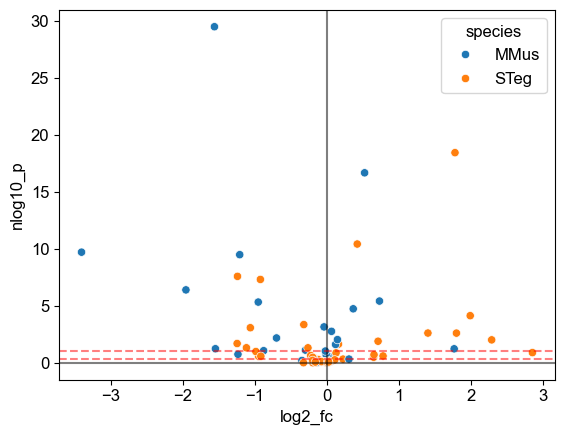

In [534]:
# volcano plot
sns.scatterplot(it_motif_df, x="log2_fc", y="nlog10_p", hue="species")
plt.axline((0,0), (0,1), color="black", alpha=0.5)
plt.axline((1,0), (0,0), color="black", alpha=0.5)

plt.axline((0,-1*np.log10(0.5)), (1,-1*np.log10(0.5)), color="red", linestyle="--", alpha=0.5)
plt.axline((0,-1*np.log10(0.1)), (1,-1*np.log10(0.1)), color="red", linestyle="--", alpha=0.5)
# labels


# plot data

In [535]:
# plot bulk probabilities across species

df_bulk_probs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame(p_obs[i], columns=["proportion"]).reset_index(names="area")
    df["mice"] = metadata.loc[i,"mice"]
    df["species"] = metadata.loc[i, "species"]
    df_bulk_probs.append(df)

plot_bulk_probs = pd.concat(df_bulk_probs).reset_index(drop=True)
# plot_bulk_probs

In [536]:
plot_bulk_probs["proportion"] = plot_bulk_probs["proportion"].astype(float)

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


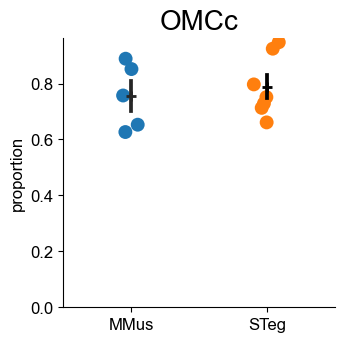

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


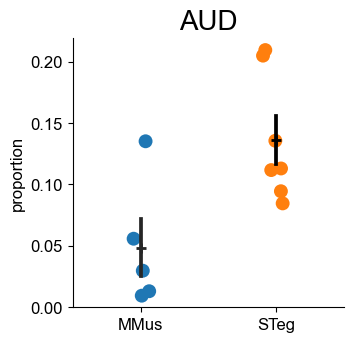

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:205: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


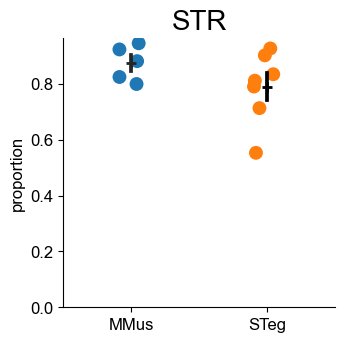

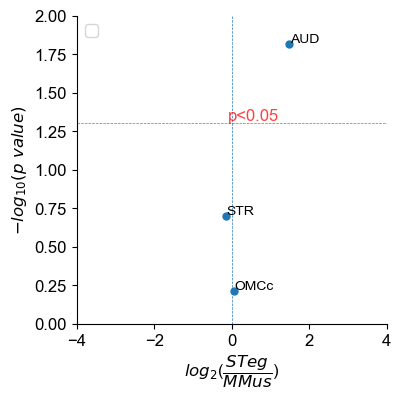

In [537]:
for area in ["OMCc", "AUD", "STR"]:
    dot_plot(plot_bulk_probs, area=area, title=area)
    plt.show()

# volcano plot
plot_vol = proportion_ttest(plot_bulk_probs)
plot_volcano(plot_vol, xlim=(-4,4), ylim=(0,-np.log10(0.01)), p_01=False)
plt.show()

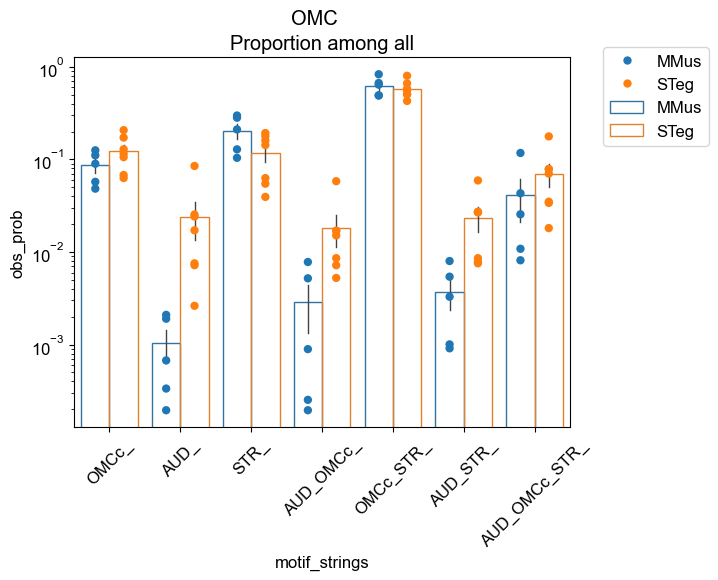

In [538]:
dot_bar_plot(it_motif_df, xaxis="motif_strings", yaxis="obs_prob", hueaxis="species", dot_size=6)
plt.yscale("log")
plt.xticks(rotation=45, ha="center")
plt.suptitle("OMC")
plt.title("Proportion among all")
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()

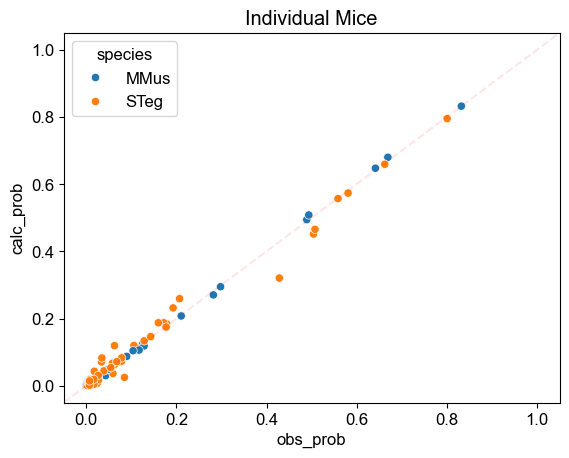

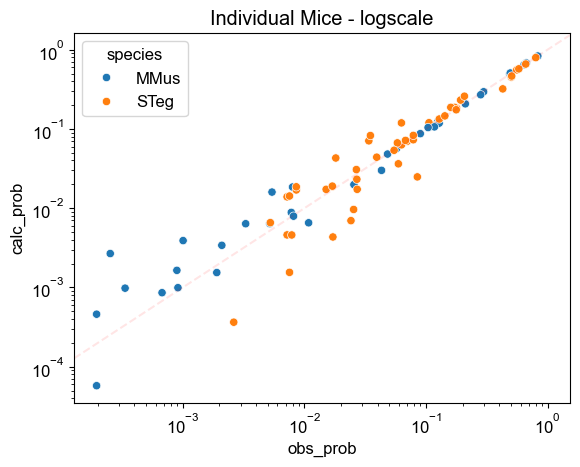

In [539]:
# calc vs. obs proportions
sns.scatterplot(it_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.title("Individual Mice")
plt.axline((0,0), (1,1), color="red", linestyle="--", alpha=0.1)
plt.show()

sns.scatterplot(it_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.axline((0.1,0.1), (1,1), color="red", linestyle="--", alpha=0.1)
plt.title("Individual Mice - logscale")
plt.show()

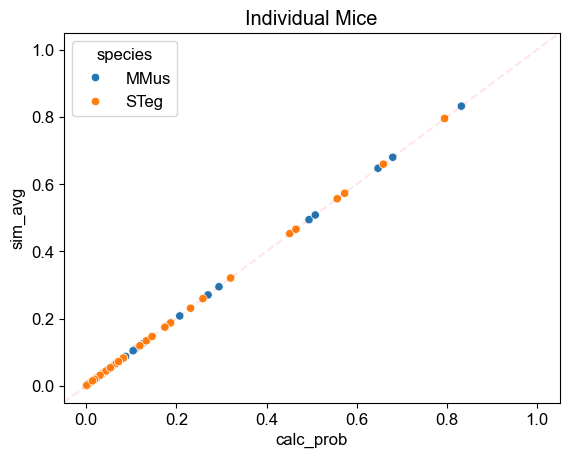

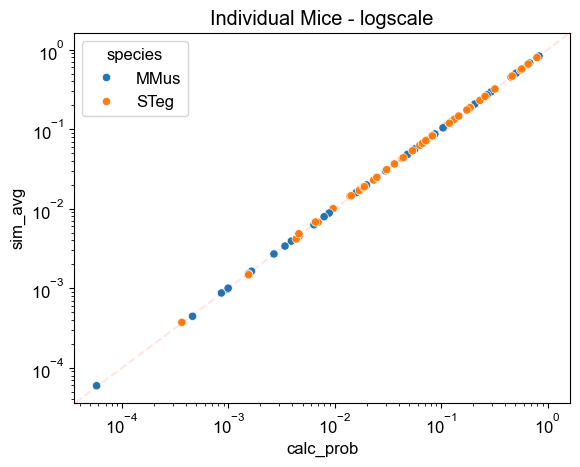

In [557]:
# calc vs simualted prob
sns.scatterplot(it_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.title("Individual Mice")
plt.axline((0,0), (1,1), color="red", linestyle="--", alpha=0.1)
plt.show()

sns.scatterplot(it_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.axline((0.0001,0.0001), (1,1), color="red", linestyle="--", alpha=0.1)
plt.title("Individual Mice - logscale")
plt.show()

## bulk scale - IT neurons

In [505]:
# repeat calculations but with concatenated data
omc_it_all = [mm_it_all, st_it_all]
species_all = ["MMus", "STeg"]


n_totals = [estimate_N_total(df) for df in omc_it_all]

n_shapes = [df.shape[0] for df in omc_it_all]
print(n_shapes)
print(n_totals)
# find bulk probabilities of each area given estimated n_totals
plot_areas = ["OMCc", "AUD", "STR"]
p_obs = []
for i in range(len(omc_it_all)):
    df = omc_it_all[i]
    area_totals = df.sum()[plot_areas]
    probabilities = area_totals/n_totals[i]
    p_obs.append(probabilities)


# calcualte dependent probabilties

# 1. add in zeros to make to n_total
n_unobs = np.array(n_totals) - np.array(n_shapes)
cols = omc_it_all[0].columns
pd.DataFrame(n_unobs)
unobs_df = [pd.DataFrame(0, index=np.arange(n), columns=cols) for n in n_unobs]
omc_it_all_adjusted = [pd.concat([omc_it_all[i], unobs_df[i]]).reset_index(drop=True) for i in range(len(omc_it_all))]
omc_it_all_adjusted[0]


obs_motifs = [df_to_motif_proportion(df, areas=["OMCc", "AUD", "STR"]) for df in omc_it_all_adjusted]
n_obs_motifs = [df_to_motif_proportion(df, areas=["OMCc", "AUD", "STR"], proportion=False) for df in omc_it_all_adjusted]
n_obs_motifs[0]
# calcualtions based on bulk probabilities
calc_motifs = [df_to_calc_pab_proportions(df, combinations=obs_motifs[0].index) for df in omc_it_all_adjusted]
calc_motifs[0]
# simulated motifs
sim_avgs = []
sim_stds = []
for i in range(len(omc_it_all)):
    foo, shuffle_prob_reps = motif_simulation(omc_it_all_adjusted[i])
    shuffled_array = np.array(shuffle_prob_reps)
    sim_avgs.append(shuffled_array.mean(axis=0))
    sim_stds.append(shuffled_array.std(axis=0))

motif_strings = TF_to_motifs(motifs.index)
motif_strings
all_motif_dfs = [pd.DataFrame({"motif_strings":motif_strings, "n_total":n_totals[i], "n_obs":n_obs_motifs[i],
                               "obs_prob":obs_motifs[i], "calc_prob":calc_motifs[i], 
                               "sim_avg":sim_avgs[i], "sim_std":sim_stds[i]}).reset_index(drop=True)
                     for i in range(len(omc_it_all))]
all_motif_dfs

[53315, 3642]
[54784, 3794]


[   motif_strings  n_total  n_obs  obs_prob  calc_prob   sim_avg   sim_std
 0          OMCc_    54784   4764  0.086960   0.085764  0.085794  0.000636
 1           AUD_    54784     53  0.000967   0.001068  0.001064  0.000136
 2           STR_    54784  11347  0.207123   0.202238  0.202257  0.000693
 3      AUD_OMCc_    54784    127  0.002318   0.003415  0.003406  0.000245
 4      OMCc_STR_    54784  35106  0.640808   0.646889  0.646858  0.000735
 5       AUD_STR_    54784    179  0.003267   0.008053  0.008056  0.000338
 6  AUD_OMCc_STR_    54784   1739  0.031743   0.025760  0.025770  0.000403,
    motif_strings  n_total  n_obs  obs_prob  calc_prob   sim_avg   sim_std
 0          OMCc_     3794    499  0.131523   0.150962  0.151000  0.003234
 1           AUD_     3794    114  0.030047   0.006872  0.006860  0.001252
 2           STR_     3794    441  0.116236   0.138815  0.138685  0.003187
 3      AUD_OMCc_     3794     84  0.022140   0.025922  0.025895  0.002334
 4      OMCc_STR_     37

In [510]:

for i in range(len(omc_it_all)):
    all_motif_dfs[i]["species"] = species_all[i]
it_motif_df = pd.concat(all_motif_dfs)
it_motif_df


,motif_strings,n_total,n_obs,obs_prob,calc_prob,sim_avg,sim_std,species
0,OMCc_,54784,4764,0.086960,0.085764,0.085794,0.000636,MMus
1,AUD_,54784,53,0.000967,0.001068,0.001064,0.000136,MMus
2,STR_,54784,11347,0.207123,0.202238,0.202257,0.000693,MMus
3,AUD_OMCc_,54784,127,0.002318,0.003415,0.003406,0.000245,MMus
4,OMCc_STR_,54784,35106,0.640808,0.646889,0.646858,0.000735,MMus
5,AUD_STR_,54784,179,0.003267,0.008053,0.008056,0.000338,MMus
6,AUD_OMCc_STR_,54784,1739,0.031743,0.025760,0.025770,0.000403,MMus
0,OMCc_,3794,499,0.131523,0.150962,0.151000,0.003234,STeg
1,AUD_,3794,114,0.030047,0.006872,0.006860,0.001252,STeg
2,STR_,3794,441,0.116236,0.138815,0.138685,0.003187,STeg


In [511]:

# significance testing
from scipy.stats import binomtest
it_motif_df = it_motif_df.reset_index(drop=True)
it_motif_df["p_value"] = it_motif_df.apply(lambda row: binomtest(row["n_obs"], row["n_total"], p=row["calc_prob"]).pvalue, axis='columns')
# log2fc of obs_prob/calc_prob
it_motif_df["log2_fc"] = it_motif_df.apply(lambda row: np.log2(row["obs_prob"]/row["calc_prob"]), axis="columns")
# -log10p
it_motif_df["nlog10_p"] = it_motif_df.apply(lambda row: (np.log10(row["p_value"]))*-1, axis="columns")
it_motif_df

,motif_strings,n_total,n_obs,obs_prob,calc_prob,sim_avg,sim_std,species,p_value,log2_fc,nlog10_p
0,OMCc_,54784,4764,0.086960,0.085764,0.085794,0.000636,MMus,3.176043e-01,0.019971,0.498114
1,AUD_,54784,53,0.000967,0.001068,0.001064,0.000136,MMus,5.130857e-01,-0.142269,0.289810
2,STR_,54784,11347,0.207123,0.202238,0.202257,0.000693,MMus,4.511195e-03,0.034429,2.345708
3,AUD_OMCc_,54784,127,0.002318,0.003415,0.003406,0.000245,MMus,3.806600e-06,-0.558969,5.419463
4,OMCc_STR_,54784,35106,0.640808,0.646889,0.646858,0.000735,MMus,2.955297e-03,-0.013628,2.529399
5,AUD_STR_,54784,179,0.003267,0.008053,0.008056,0.000338,MMus,9.362591e-46,-1.301445,45.028604
6,AUD_OMCc_STR_,54784,1739,0.031743,0.025760,0.025770,0.000403,MMus,1.312106e-17,0.301318,16.882031
7,OMCc_,3794,499,0.131523,0.150962,0.151000,0.003234,STeg,7.255567e-04,-0.198870,3.139329
8,AUD_,3794,114,0.030047,0.006872,0.006860,0.001252,STeg,2.397358e-37,2.128525,36.620267
9,STR_,3794,441,0.116236,0.138815,0.138685,0.003187,STeg,4.353684e-05,-0.256107,4.361143


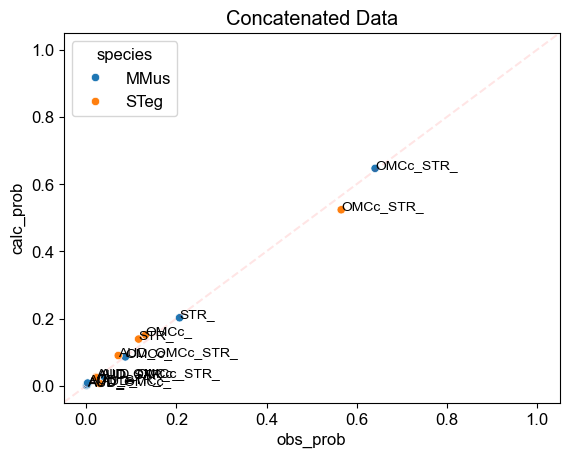

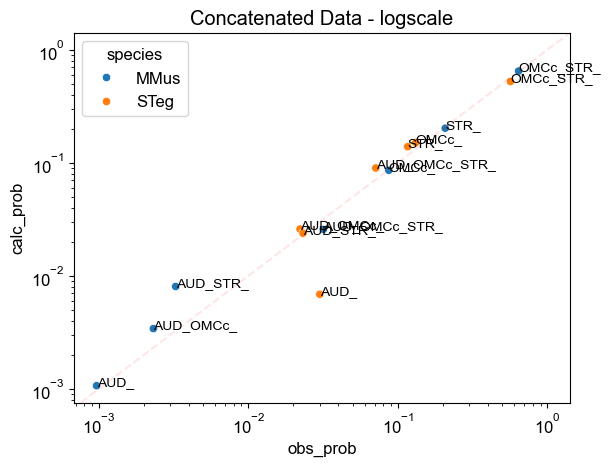

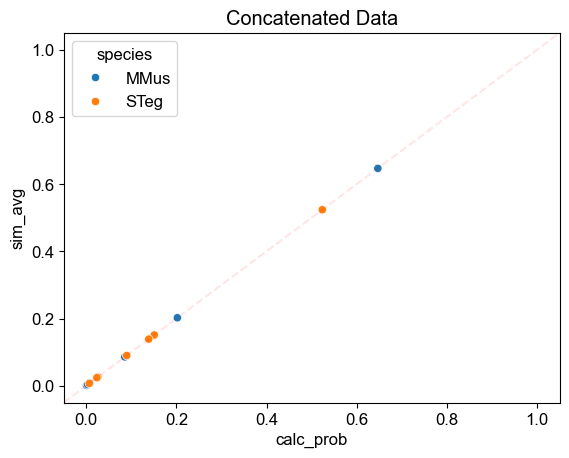

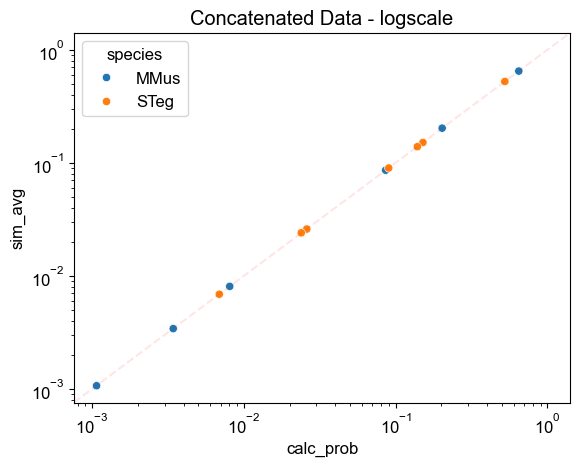

In [522]:
# plotting
# calc vs. obs proportions
sns.scatterplot(it_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.title("Concatenated Data")
plt.axline((0,0), (1,1), color="red", linestyle="--", alpha=0.1)
# add labels
for index, row in it_motif_df.iterrows():
    plt.text(row["obs_prob"], y=row["calc_prob"], s=row["motif_strings"], size=10)
plt.show()

sns.scatterplot(it_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.axline((0.1,0.1), (1,1), color="red", linestyle="--", alpha=0.1)
# add labels
for index, row in it_motif_df.iterrows():
    plt.text(row["obs_prob"], y=row["calc_prob"], s=row["motif_strings"], size=10)
plt.title("Concatenated Data - logscale")
plt.show()

# calc vs simualted prob
sns.scatterplot(it_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.title("Concatenated Data")
plt.axline((0,0), (1,1), color="red", linestyle="--", alpha=0.1)
plt.show()

sns.scatterplot(it_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.title("Concatenated Data - logscale")
plt.axline((0.1,0.1), (1,1), color="red", linestyle="--", alpha=0.1)
plt.show()

# PT_motifs

## individual scale

In [416]:
# calculate n_totals of pt cells
n_totals = [estimate_N_total(df) for df in omc_pt]

n_shapes = [df.shape[0] for df in omc_pt]
print(n_shapes)
print(n_totals)

# keep original number of not enough cells
n_totals[5] = n_shapes[5]
n_totals[7] = n_shapes[7]
print(n_totals)

[1313, 2198, 1610, 93, 47, 70, 1171, 2967, 211, 119, 225, 216]
[2429, 4565, 1970, 96, 136, 'roots equal or less than n_obs', 1189, 'roots equal or less than n_obs', 223, 123, 247, 234]
[2429, 4565, 1970, 96, 136, 70, 1189, 2967, 223, 123, 247, 234]


In [429]:
plot_areas = ['TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']

# find bulk probabilities of each area given estimated n_totals
p_obs = []
for i in range(metadata.shape[0]):
    df = omc_pt[i]
    area_totals = df.sum()[plot_areas]
    probabilities = area_totals/n_totals[i]
    p_obs.append(probabilities)

# calcualte dependent probabilties
# 1. add in zeros to make to n_total
n_unobs = np.array(n_totals) - np.array(n_shapes)
cols = omc_pt[0].columns
pd.DataFrame(n_unobs)
unobs_df = [pd.DataFrame(0, index=np.arange(n), columns=cols) for n in n_unobs]
omc_pt_adjusted = [pd.concat([omc_pt[i], unobs_df[i]]).reset_index(drop=True) for i in range(len(omc_pt))]
omc_pt_adjusted[0]


obs_motifs = [df_to_motif_proportion(df, areas=plot_areas) for df in omc_pt_adjusted]
obs_motifs[0]
# calcualtions based on bulk probabilities
calc_motifs = [df_to_calc_pab_proportions(df, combinations=obs_motifs[0].index) for df in omc_pt_adjusted]
calc_motifs[0]
# simulated motifs
sim_avgs = []
sim_stds = []
for i in range(metadata.shape[0]):
    foo, shuffle_prob_reps = motif_simulation(omc_pt_adjusted[i], plot_areas=plot_areas)
    shuffled_array = np.array(shuffle_prob_reps)
    sim_avgs.append(shuffled_array.mean(axis=0))
    sim_stds.append(shuffled_array.std(axis=0))


In [431]:
motif_strings = TF_to_motifs(calc_motifs[0].index)

all_motif_dfs = [pd.DataFrame({"motif_strings":motif_strings, "obs_prob":obs_motifs[i], 
                     "calc_prob":calc_motifs[i], "sim_avg":sim_avgs[i], "sim_std":sim_stds[i]}).reset_index(drop=True)
                     for i in range(metadata.shape[0])]
for i in range(metadata.shape[0]):
    all_motif_dfs[i][["mice", "species"]] = [metadata.loc[i,"mice"], metadata.loc[i,"species"]]
plot_df = pd.concat(all_motif_dfs)
plot_df



,motif_strings,obs_prob,calc_prob,sim_avg,sim_std,mice,species
0,TH_,0.000000,0.050474,0.050462,0.003828,MMM1,MMus
1,HY_,0.017291,0.101412,0.101717,0.005368,MMM1,MMus
2,AMY_,0.001235,0.005163,0.005171,0.001377,MMM1,MMus
3,SNr_,0.006175,0.042440,0.042495,0.003820,MMM1,MMus
4,SCm_,0.002470,0.015405,0.015392,0.002346,MMM1,MMus
...,...,...,...,...,...,...,...
250,AMY_BS_HY_PAG_PG_SCm_TH_,0.004274,0.001769,0.001829,0.002692,STM7,STeg
251,BS_HY_PAG_PG_SCm_SNr_TH_,0.004274,0.001374,0.001487,0.002502,STM7,STeg
252,AMY_BS_PAG_PG_SCm_SNr_TH_,0.034188,0.007542,0.007274,0.005243,STM7,STeg
253,AMY_BS_HY_PAG_PG_SCm_SNr_,0.012821,0.002905,0.003077,0.003528,STM7,STeg


In [541]:
plot_df

,motif_strings,obs_prob,calc_prob,sim_avg,sim_std,mice,species
0,TH_,0.000000,0.050474,0.050462,0.003828,MMM1,MMus
1,HY_,0.017291,0.101412,0.101717,0.005368,MMM1,MMus
2,AMY_,0.001235,0.005163,0.005171,0.001377,MMM1,MMus
3,SNr_,0.006175,0.042440,0.042495,0.003820,MMM1,MMus
4,SCm_,0.002470,0.015405,0.015392,0.002346,MMM1,MMus
...,...,...,...,...,...,...,...
250,AMY_BS_HY_PAG_PG_SCm_TH_,0.004274,0.001769,0.001829,0.002692,STM7,STeg
251,BS_HY_PAG_PG_SCm_SNr_TH_,0.004274,0.001374,0.001487,0.002502,STM7,STeg
252,AMY_BS_PAG_PG_SCm_SNr_TH_,0.034188,0.007542,0.007274,0.005243,STM7,STeg
253,AMY_BS_HY_PAG_PG_SCm_SNr_,0.012821,0.002905,0.003077,0.003528,STM7,STeg


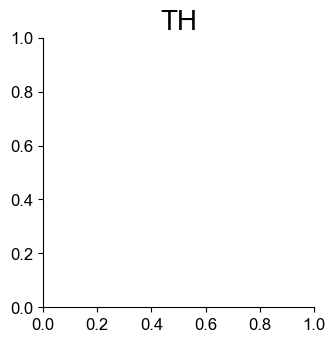

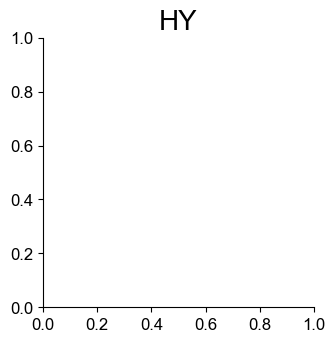

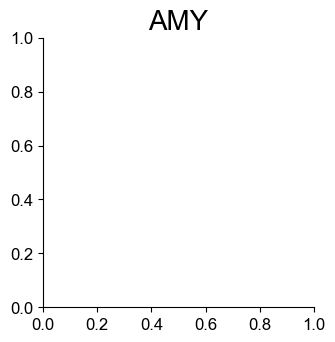

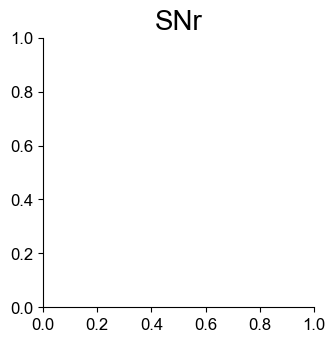

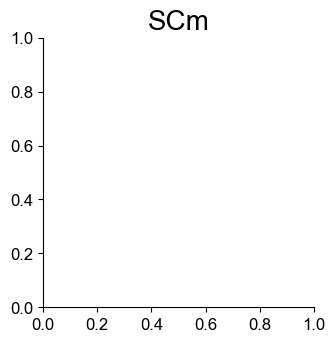

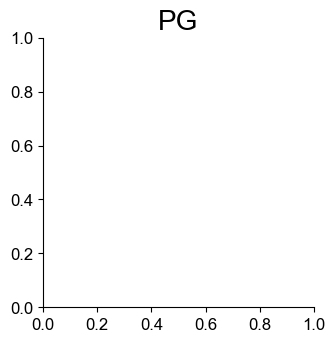

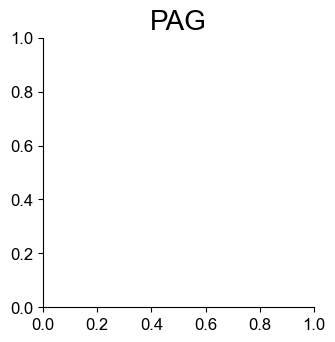

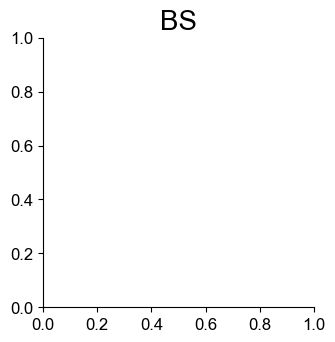

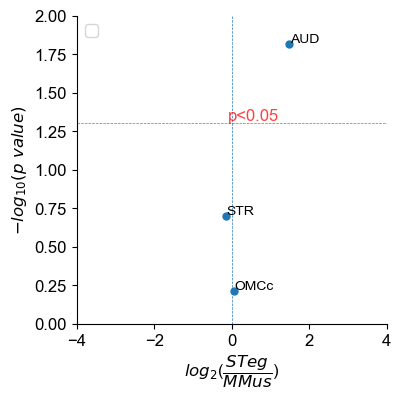

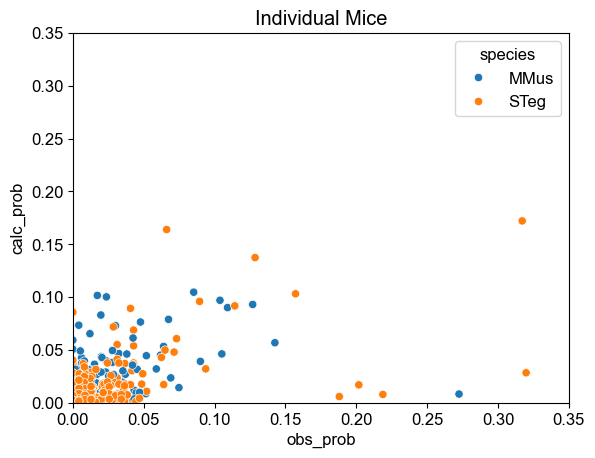

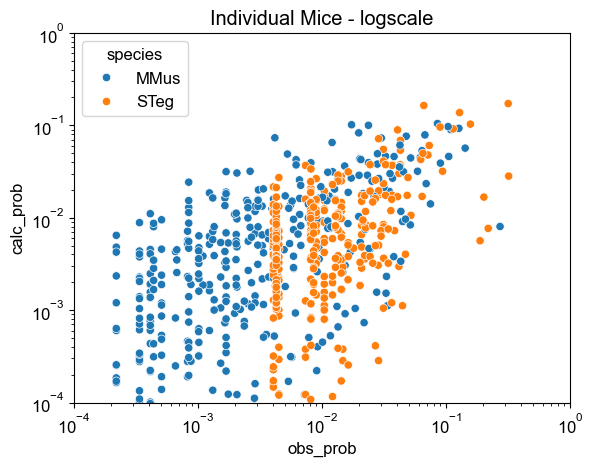

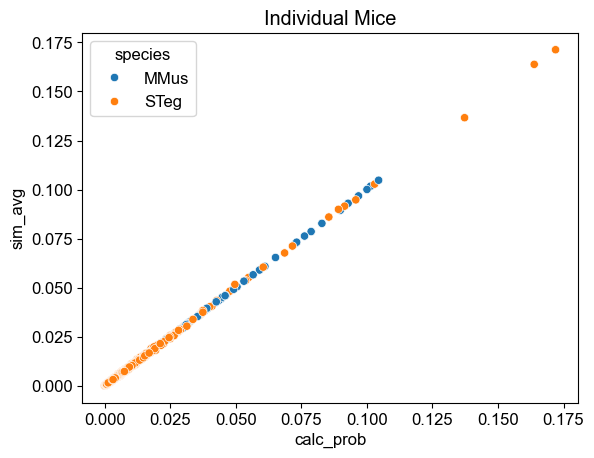

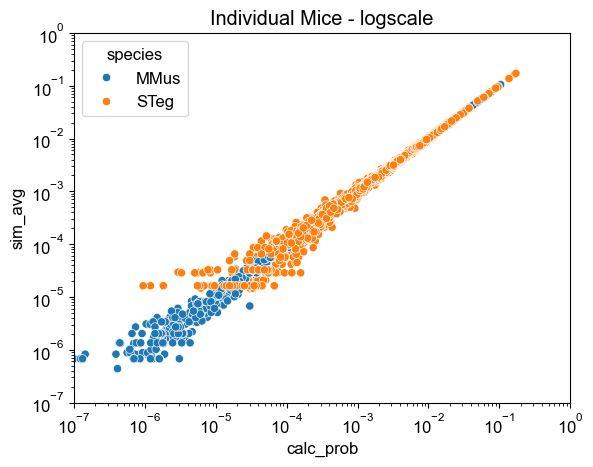

In [542]:
plot_areas = ['TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']

# plot data
# plot bulk probabilities across species
df_bulk_probs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame(p_obs[i], columns=["proportion"]).reset_index(names="area")
    df["mice"] = metadata.loc[i,"mice"]
    df["species"] = metadata.loc[i, "species"]
    df_bulk_probs.append(df)

plot_bulk_probs = pd.concat(df_bulk_probs).reset_index(drop=True)
plot_bulk_probs
plot_bulk_probs["proportion"] = plot_bulk_probs["proportion"].astype(float)
for area in plot_areas:
    dot_plot(plot_bulk_probs, area=area, title=area)
    plt.show()

# volcano plot
plot_vol = proportion_ttest(plot_bulk_probs)
plot_volcano(plot_vol, xlim=(-4,4), ylim=(0,-np.log10(0.01)), p_01=False)
plt.show()

# calc vs. obs proportions
sns.scatterplot(plot_df, x="obs_prob", y="calc_prob", hue="species")
plt.title("Individual Mice")
plt.xlim(0,0.35)
plt.ylim(0,0.35)
plt.show()
# log scale
sns.scatterplot(plot_df, x="obs_prob", y="calc_prob", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.0001, 1)
plt.ylim(0.0001, 1)
plt.title("Individual Mice - logscale")
plt.show()


# calc vs simualted prob
sns.scatterplot(plot_df, x="calc_prob", y="sim_avg", hue="species")
plt.title("Individual Mice")
plt.show()
# log scale
sns.scatterplot(plot_df, x="calc_prob", y="sim_avg", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.0000001, 1)
plt.ylim(0.0000001, 1)
plt.title("Individual Mice - logscale")
plt.show()

## bulk scale

In [572]:
# repeat calculations but with concatenated data
omc_pt_all = [mm_it_all, st_it_all]
species_all = ["MMus", "STeg"]


n_totals = [estimate_N_total(df) for df in omc_pt_all]

n_shapes = [df.shape[0] for df in omc_pt_all]
print(n_shapes)
print(n_totals)
# find bulk probabilities of each area given estimated n_totals
plot_areas = ['TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']
p_obs = []
for i in range(len(omc_pt_all)):
    df = omc_pt_all[i]
    area_totals = df.sum()[plot_areas]
    probabilities = area_totals/n_totals[i]
    p_obs.append(probabilities)


# calcualte dependent probabilties

# 1. add in zeros to make to n_total
n_unobs = np.array(n_totals) - np.array(n_shapes)
cols = omc_pt_all[0].columns
pd.DataFrame(n_unobs)
unobs_df = [pd.DataFrame(0, index=np.arange(n), columns=cols) for n in n_unobs]
omc_pt_all_adjusted = [pd.concat([omc_pt_all[i], unobs_df[i]]).reset_index(drop=True) for i in range(len(omc_pt_all))]
omc_pt_all_adjusted[0]


obs_motifs = [df_to_motif_proportion(df, areas=plot_areas) for df in omc_pt_all_adjusted]
n_obs_motifs = [df_to_motif_proportion(df, areas=plot_areas, proportion=False) for df in omc_pt_all_adjusted]
n_obs_motifs[0]
# calcualtions based on bulk probabilities
calc_motifs = [df_to_calc_pab_proportions(df, combinations=obs_motifs[0].index) for df in omc_pt_all_adjusted]
calc_motifs[0]
# simulated motifs
sim_avgs = []
sim_stds = []
for i in range(len(omc_pt_all)):
    foo, shuffle_prob_reps = motif_simulation(omc_pt_all_adjusted[i], plot_areas=plot_areas)
    shuffled_array = np.array(shuffle_prob_reps)
    sim_avgs.append(shuffled_array.mean(axis=0))
    sim_stds.append(shuffled_array.std(axis=0))


[53315, 3642]
[54784, 3794]


In [560]:

motif_strings = TF_to_motifs(obs_motifs[0].index)
motif_strings
all_motif_dfs = [pd.DataFrame({"motif_strings":motif_strings, "n_total":n_totals[i], "n_obs":n_obs_motifs[i],
                               "obs_prob":obs_motifs[i], "calc_prob":calc_motifs[i], 
                               "sim_avg":sim_avgs[i], "sim_std":sim_stds[i]}).reset_index(drop=True)
                     for i in range(len(omc_pt_all))]
all_motif_dfs


ValueError: All arrays must be of the same length

In [ ]:

for i in range(len(omc_pt_all)):
    all_motif_dfs[i]["species"] = species_all[i]
pt_motif_df = pd.concat(all_motif_dfs)
pt_motif_df


# significance testing
from scipy.stats import binomtest
pt_motif_df = pt_motif_df.reset_index(drop=True)
pt_motif_df["p_value"] = pt_motif_df.apply(lambda row: binomtest(row["n_obs"], row["n_total"], p=row["calc_prob"]).pvalue, axis='columns')
# log2fc of obs_prob/calc_prob
pt_motif_df["log2_fc"] = pt_motif_df.apply(lambda row: np.log2(row["obs_prob"]/row["calc_prob"]), axis="columns")
# -log10p
pt_motif_df["nlog10_p"] = pt_motif_df.apply(lambda row: (np.log10(row["p_value"]))*-1, axis="columns")
pt_motif_df


In [544]:
pt_motif_df = plot_df.copy()
pt_motif_df

,motif_strings,obs_prob,calc_prob,sim_avg,sim_std,mice,species
0,TH_,0.000000,0.050474,0.050462,0.003828,MMM1,MMus
1,HY_,0.017291,0.101412,0.101717,0.005368,MMM1,MMus
2,AMY_,0.001235,0.005163,0.005171,0.001377,MMM1,MMus
3,SNr_,0.006175,0.042440,0.042495,0.003820,MMM1,MMus
4,SCm_,0.002470,0.015405,0.015392,0.002346,MMM1,MMus
...,...,...,...,...,...,...,...
250,AMY_BS_HY_PAG_PG_SCm_TH_,0.004274,0.001769,0.001829,0.002692,STM7,STeg
251,BS_HY_PAG_PG_SCm_SNr_TH_,0.004274,0.001374,0.001487,0.002502,STM7,STeg
252,AMY_BS_PAG_PG_SCm_SNr_TH_,0.034188,0.007542,0.007274,0.005243,STM7,STeg
253,AMY_BS_HY_PAG_PG_SCm_SNr_,0.012821,0.002905,0.003077,0.003528,STM7,STeg


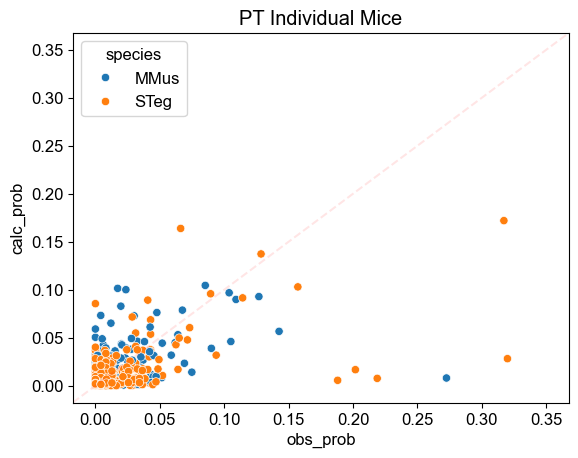

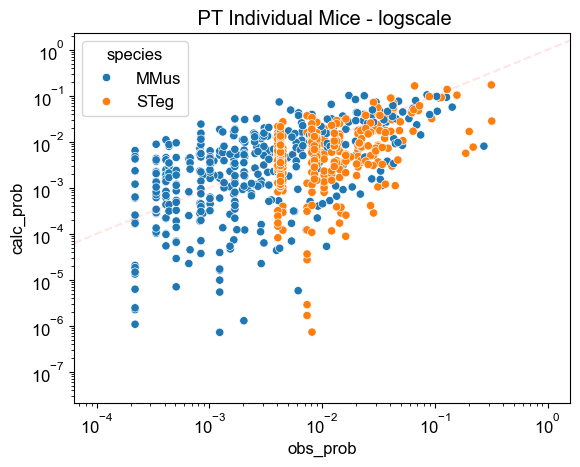

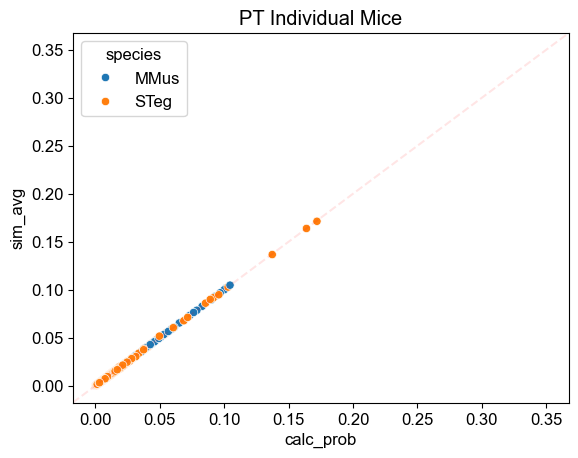

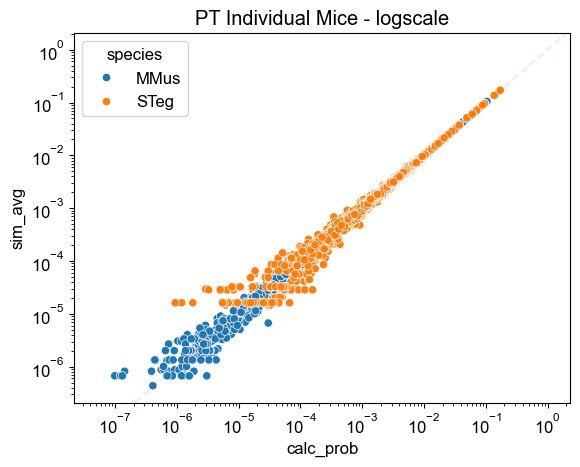

In [555]:

# plotting
# calc vs. obs proportions
sns.scatterplot(pt_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.title("PT Individual Mice")
plt.axline((0,0), (0.35,0.35), color="red", linestyle="--", alpha=0.1)
# add labels
# for index, row in pt_motif_df.iterrows():
#     plt.text(row["obs_prob"], y=row["calc_prob"], s=row["motif_strings"], size=10)
plt.show()

sns.scatterplot(pt_motif_df, x="obs_prob", y="calc_prob", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.axline((0.0001,0.0001), (1,1), color="red", linestyle="--", alpha=0.1)
# add labels
# for index, row in pt_motif_df.iterrows():
#     plt.text(row["obs_prob"], y=row["calc_prob"], s=row["motif_strings"], size=10)
plt.title(" PT Individual Mice - logscale")
plt.show()

# calc vs simualted prob
sns.scatterplot(pt_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.title("PT Individual Mice")
plt.axline((0,0), (0.35,0.35), color="red", linestyle="--", alpha=0.1)
plt.show()

sns.scatterplot(pt_motif_df, x="calc_prob", y="sim_avg", hue="species")
plt.yscale("log")
plt.xscale("log")
plt.title("PT Individual Mice - logscale")
plt.axline((0.1,0.1), (1,1), color="red", linestyle="--", alpha=0.1)
plt.show()